# Support Vector Machines

In [6]:
%matplotlib inline
import math
import numpy as np
from pylab import *
from sklearn import svm

In [7]:
#Create fake so-many-dimensional clusters for so many observations in so many clusters
def createClusteredData(dimensions,observations,clusters,sigma_div=5):
    pointsPerCluster = int(1.0*observations/clusters)
    x = []
    y = []
    for cluster in range(clusters):
        centroid = [ np.random.uniform() for dim in range(dimensions) ]        
        sigmaSq = (np.random.normal()/sigma_div)**2
        for point in range(pointsPerCluster):
            x.append([np.random.normal(centroid[dim],sigmaSq) for dim in range(dimensions)])
            y.append(cluster)
    x = np.array(x)
    y = np.array(y)
    return x,y

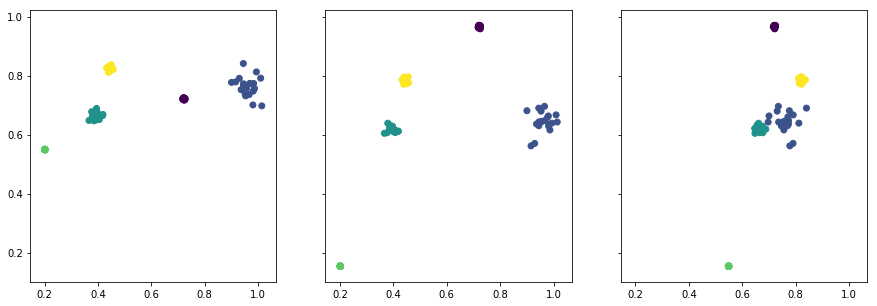

In [8]:
data = createClusteredData(3,100,5)
fig,(ax1,ax2,ax3)=plt.subplots(1,3,sharex=True,sharey=True,figsize=(15, 5))
ax1.scatter(data[0][:,0],data[0][:,1],c=data[1].astype(np.float))
ax2.scatter(data[0][:,0],data[0][:,2],c=data[1].astype(np.float))
ax3.scatter(data[0][:,1],data[0][:,2],c=data[1].astype(np.float))
plt.show()

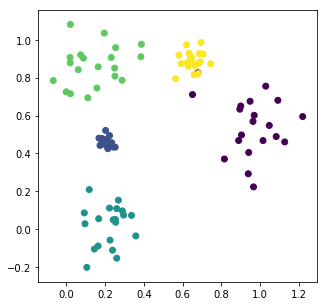

In [9]:
data = createClusteredData(2,100,5,2.5)
figure(figsize=(5,5))
plt.scatter(data[0][:,0],data[0][:,1],c=data[1].astype(np.float))
plt.show()

In [58]:
def plotPredictions(data,models,width=3):
    minx,maxx=data[0][:,0].min(),data[0][:,0].max()
    miny,maxy=data[0][:,1].min(),data[0][:,1].max()
    xx, yy = np.meshgrid(np.arange(minx,maxx,0.01),
                         np.arange(miny,maxy,0.01))
    rows=int(math.ceil(1.0*len(models)/width))
    cols=min(len(models),width)
    fig,ax=plt.subplots(rows,cols,sharex=True,sharey=True,figsize=(5*cols, 5*rows))
    if type(ax)!=ndarray:
        ax=np.array([ax])
    else:
        ax=ax.flatten()
    for m in range(len(models)):
        y = models[m].predict(np.c_[xx.ravel(), yy.ravel()])
        y = y.reshape(xx.shape)
        ax[m].contourf(xx, yy, y, cmap=plt.cm.Paired, alpha=0.8)
        ax[m].scatter(data[0][:,0],data[0][:,1],c=data[1].astype(np.float))
    plt.show()

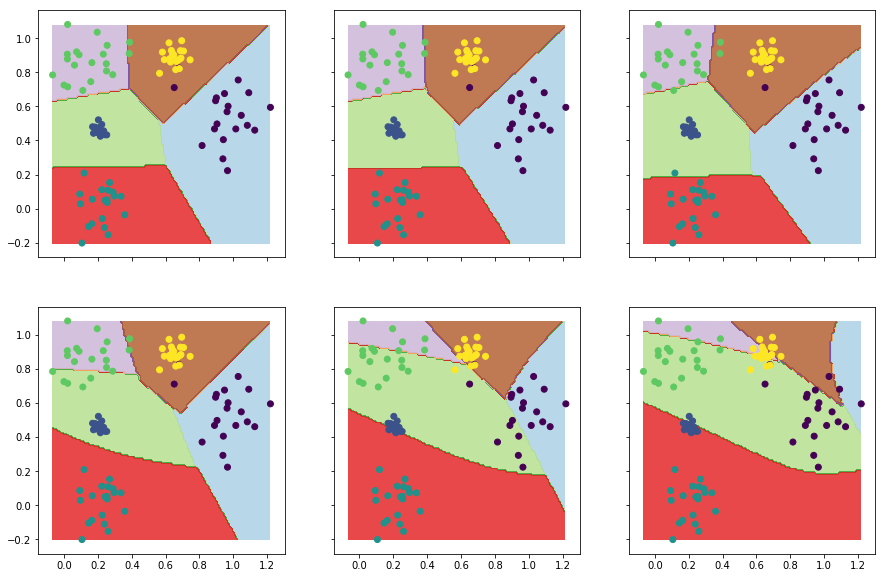

In [59]:
models = [svm.SVC(kernel='linear', C=1.0).fit(data[0], data[1]),
          svm.SVC(kernel='rbf', C=1.0).fit(data[0], data[1]),
          svm.SVC(kernel='sigmoid', C=1.0).fit(data[0], data[1]),
          svm.SVC(kernel='poly', degree=2, C=1.0).fit(data[0], data[1]),
          svm.SVC(kernel='poly', degree=5, C=1.0).fit(data[0], data[1]),
          svm.SVC(kernel='poly', degree=10, C=1.0).fit(data[0], data[1])]

plotPredictions(data,models)